--------------- Projet de Régression Logistique : Prédiction de l'Attrition des Employés ----------------

------> Par ZIAN Hafsa



1. Exploration des Données (AED)

    Age : Âge de l'employé.

    Attrition : Indicateur de l'attrition (Yes/No).

    BusinessTravel : Fréquence des déplacements professionnels.

    DailyRate : Tarif quotidien.

    Department : Département de l'employé.

    DistanceFromHome : Distance entre le domicile et le travail.

    Education : Niveau d'éducation.

    EducationField : Domaine d'études.

    EmployeeCount : Nombre d'employés.

    EmployeeNumber : Numéro d'identification de l'employé.

    EnvironmentSatisfaction : Satisfaction de l'environnement de travail.

    Gender : Sexe de l'employé.

    HourlyRate : Taux horaire.

    JobInvolvement : Niveau d'implication au travail.

    JobLevel : Niveau du poste.

    JobRole : Rôle de l'employé.

    JobSatisfaction : Satisfaction professionnelle.

    MaritalStatus : Statut marital.

    MonthlyIncome : Revenu mensuel.

    MonthlyRate : Taux mensuel.

    NumCompaniesWorked : Nombre d'entreprises dans lesquelles l'employé a travaillé.

    Over18 : Si l'employé a plus de 18 ans.

    OverTime : Si l'employé travaille des heures supplémentaires.

    PercentSalaryHike : Augmentation de salaire en pourcentage.

    PerformanceRating : Évaluation des performances.

    RelationshipSatisfaction : Satisfaction des relations de travail.

    StandardHours : Nombre d'heures standard de travail.

    StockOptionLevel : Niveau des options d'actions.

    TotalWorkingYears : Nombre total d'années d'expérience professionnelle.

    TrainingTimesLastYear : Nombre de formations l'année dernière.

    WorkLifeBalance : Équilibre travail-vie personnelle.

    YearsAtCompany : Nombre d'années passées dans l'entreprise.

    YearsInCurrentRole : Nombre d'années dans le rôle actuel.

    YearsSinceLastPromotion : Nombre d'années depuis la dernière promotion.
    
    YearsWithCurrManager : Nombre d'années avec le manager actuel.

2. Prétraitement des Données

*** Traitement des valeurs manquantes : 

    Vous devez identifier les colonnes avec des valeurs manquantes et les traiter en les remplissant ou en supprimant les lignes/colonnes affectées. 

***Encodage des variables catégorielles : 

    Certaines colonnes sont catégorielles comme Attrition, Gender, BusinessTravel, etc. Vous pouvez les encoder en utilisant LabelEncoder ou OneHotEncoder de sklearn. 

***Normalisation des données numériques : 

    les colonnes comme DailyRate, Age, MonthlyIncome peuvent être normalisées ou standardisées à l'aide de StandardScaler ou MinMaxScaler de sklearn.


3. Construction des Modèles

Implémenter un modèle de classification basé sur un arbre de décision --> DecisionTreeClassifier de sklearn

Implémenter un modèle de classification basé sur une forêt aléatoire --> RandomForestClassifier de sklearn

Ajustement d'Hyperparamètres --> GridSearchCV ou RandomizedSearchCV

Évaluation des Performances --> Des métriques




In [11]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Charger les données
df = pd.read_csv('donnees_projet2.csv')

# Liste des colonnes catégorielles à encoder avec LabelEncoder
categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'OverTime', 'EducationField']  # Ajoutez d'autres colonnes si nécessaire

# Initialiser LabelEncoder
le = LabelEncoder()

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Encoder la colonne 'Over18' (si elle contient des valeurs comme 'Y' ou 'N')
df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})

# Vérification des transformations
print(df[categorical_columns + ['Over18']].head())

# Sélectionner les features et la cible
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)  # Exclure 'Attrition' et 'EmployeeNumber'
y = df['Attrition']

# Normalisation des données numériques
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred_dt = dt_model.predict(X_test)
print("Performance de l'Arbre de Décision :")
print(f"Précision : {accuracy_score(y_test, y_pred_dt)}")
print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred_dt)}")

# Construction du modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred_rf = rf_model.predict(X_test)
print("\nPerformance de la Forêt Aléatoire :")
print(f"Précision : {accuracy_score(y_test, y_pred_rf)}")
print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred_rf)}")


# Comparaison des modèles
if accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_rf):
    print("L'arbre de décision a de meilleures performances.")
else:
    print("La forêt aléatoire a de meilleures performances.")

   BusinessTravel  Department  Gender  MaritalStatus  JobRole  OverTime  \
0               2           2       0              2        7         1   
1               1           1       1              1        6         0   
2               2           1       1              2        2         1   
3               1           1       0              1        6         1   
4               2           1       1              1        2         0   

   EducationField  Over18  
0               1       1  
1               1       1  
2               4       1  
3               1       1  
4               3       1  
Performance de l'Arbre de Décision :
Précision : 0.782312925170068
Matrice de confusion :
[[223  32]
 [ 32   7]]
Rapport de classification :
              precision    recall  f1-score   support

          No       0.87      0.87      0.87       255
         Yes       0.18      0.18      0.18        39

    accuracy                           0.78       294
   macro avg       0.5

---> la Visualisation des Données :

Visualisation de l'attrition par Département :

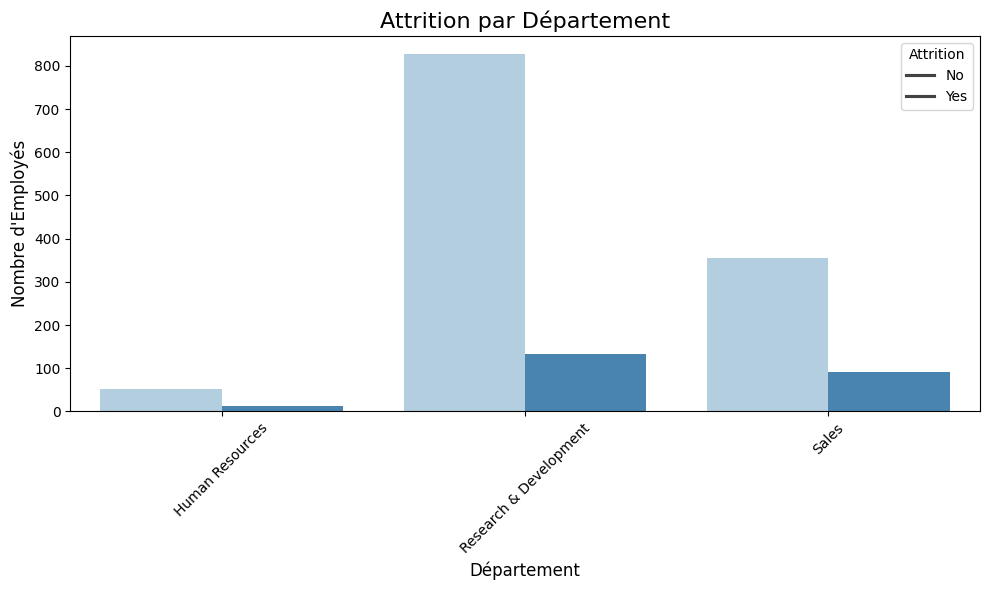

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('donnees_projet2.csv')  # Remplacez par le chemin de votre fichier

# Encodage de la variable 'Attrition' pour la rendre binaire (0 = No, 1 = Yes)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Groupement des données par Département et Attrition
attrition_by_dept = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_dept, x='Department', y='Count', hue='Attrition', palette="Blues")

# Personnalisation du graphique
plt.title("Attrition par Département", fontsize=16)
plt.xlabel("Département", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Affichage
plt.tight_layout()
plt.show()
